## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 2. Load and Explore the Dataset

In [2]:
df = pd.read_csv('fuel.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

Dataset Shape: (22556, 13)

First 5 rows:
   YEAR   MAKE    MODEL VEHICLE CLASS  ENGINE SIZE  CYLINDERS TRANSMISSION  \
0  2000  ACURA    1.6EL       COMPACT          1.6          4           A4   
1  2000  ACURA    1.6EL       COMPACT          1.6          4           M5   
2  2000  ACURA    3.2TL      MID-SIZE          3.2          6          AS5   
3  2000  ACURA    3.5RL      MID-SIZE          3.5          6           A4   
4  2000  ACURA  INTEGRA    SUBCOMPACT          1.8          4           A4   

  FUEL  FUEL CONSUMPTION  HWY (L/100 km)  COMB (L/100 km)  COMB (mpg)  \
0    X               9.2             6.7              8.1          35   
1    X               8.5             6.5              7.6          37   
2    Z              12.2             7.4             10.0          28   
3    Z              13.4             9.2             11.5          25   
4    X              10.0             7.0              8.6          33   

   EMISSIONS  
0        186  
1        175  
2    

## 3. Data Preprocessing


In [3]:
print("Missing values in each column:")
print(df.isnull().sum())

# Check data types
print("\nData types:")
print(df.dtypes)

# Check for any inconsistencies in the EMISSIONS column (our target variable)
print(f"\nUnique values in EMISSIONS column (first 10): {sorted(df['EMISSIONS'].unique())[:10]}")
print(f"Min CO2 Emissions: {df['EMISSIONS'].min()}")
print(f"Max CO2 Emissions: {df['EMISSIONS'].max()}")

# Display column names to ensure we're using the correct ones
print("\nColumn names:")
print(df.columns.tolist())

Missing values in each column:
YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

Data types:
YEAR                  int64
MAKE                 object
MODEL                object
VEHICLE CLASS        object
ENGINE SIZE         float64
CYLINDERS             int64
TRANSMISSION         object
FUEL                 object
FUEL CONSUMPTION    float64
HWY (L/100 km)      float64
COMB (L/100 km)     float64
COMB (mpg)            int64
EMISSIONS             int64
dtype: object

Unique values in EMISSIONS column (first 10): [np.int64(83), np.int64(85), np.int64(87), np.int64(94), np.int64(96), np.int64(99), np.int64(101), np.int64(102), np.int64(103), np.int64(104)]
Min CO2 Emissions: 83
Max CO2 Emissions: 608

Column names:
['YEAR', 'MAKE', 'MODEL', '

## 4. Exploratory Data Analysis


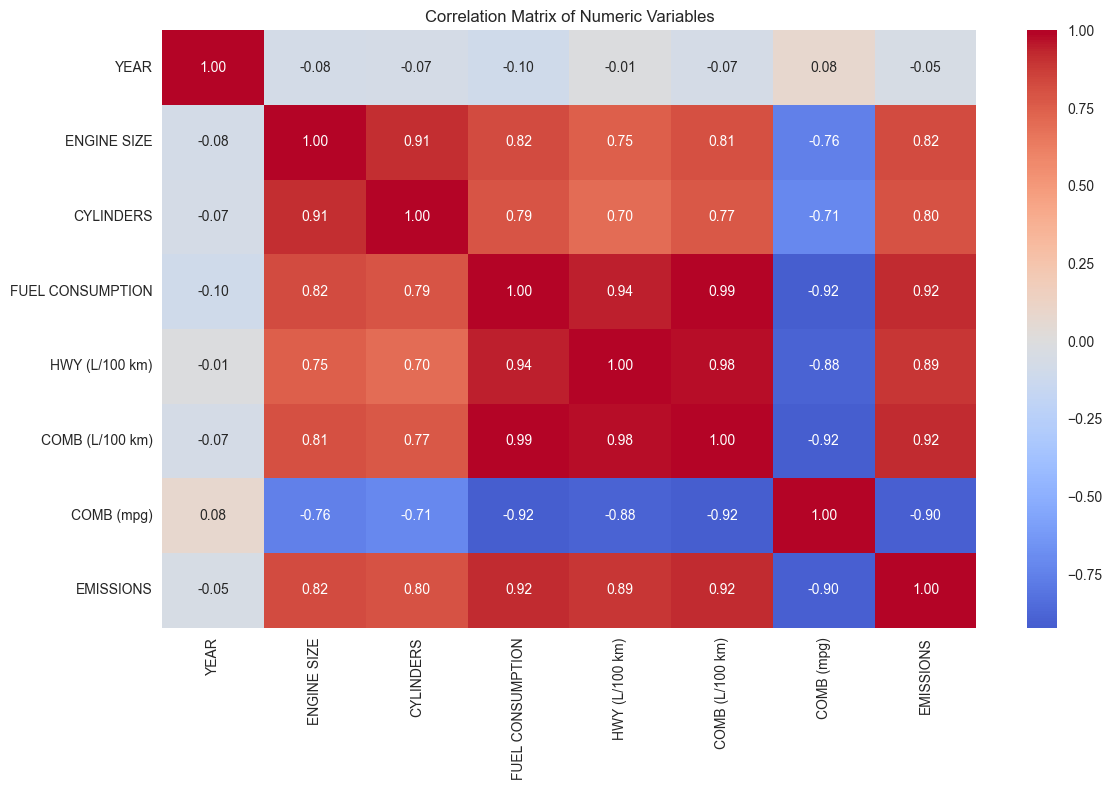

In [4]:
plt.figure(figsize=(12, 8))
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()


# Distribution of Engine Size and CO2 Emissions

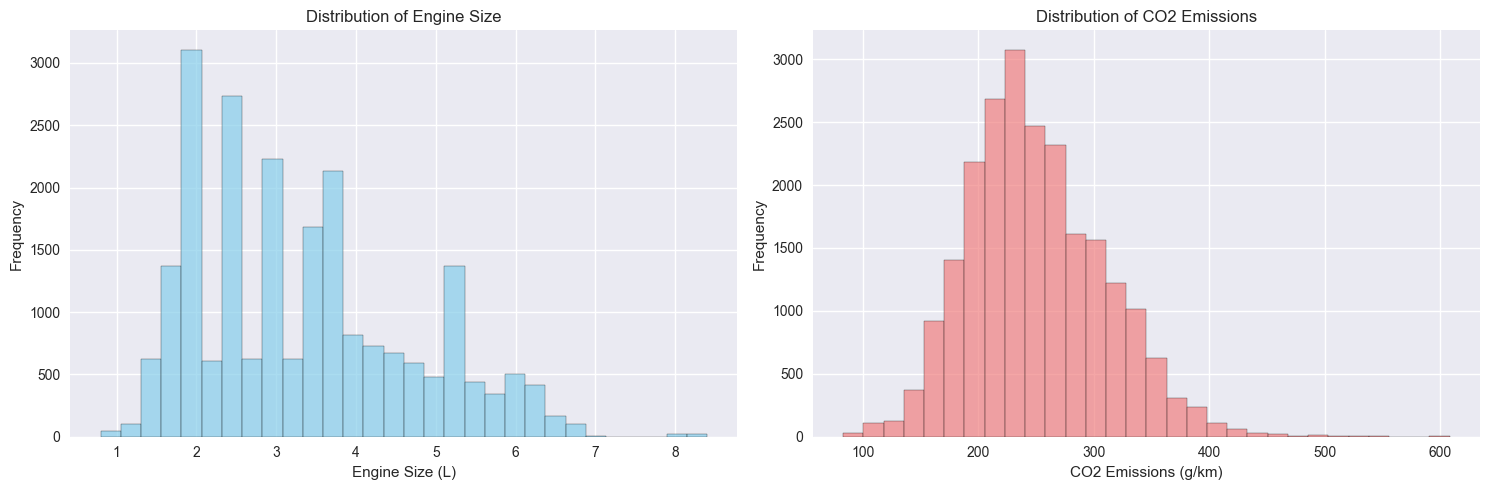

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df['ENGINE SIZE'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Engine Size (L)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Engine Size')

axes[1].hist(df['EMISSIONS'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1].set_xlabel('CO2 Emissions (g/km)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of CO2 Emissions')

plt.tight_layout()
plt.show()

## 5. Simple Linear Regression: Engine Size vs CO2 Emissions


### 5.1 Prepare the Data


In [6]:
X = df['ENGINE SIZE'].values.reshape(-1, 1)  # Independent variable (Engine Size)
y = df['EMISSIONS'].values  # Dependent variable (CO2 Emissions)

In [7]:
print(f"Shape of y (CO2 Emissions): {y.shape}")

# Split the data: 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Shape of y (CO2 Emissions): (22556,)

Training set size: 15789 samples
Testing set size: 6767 samples


### 5.2 Apply Linear Regression

In [8]:
model_engine = LinearRegression()
model_engine.fit(X_train, y_train)

# Make predictions
y_train_pred = model_engine.predict(X_train)
y_test_pred = model_engine.predict(X_test)

# Display model parameters
print(f"Model Coefficient (Slope): {model_engine.coef_[0]:.4f}")
print(f"Model Intercept: {model_engine.intercept_:.4f}")
print(f"\nLinear Equation: CO2 Emissions = {model_engine.coef_[0]:.4f} * Engine Size + {model_engine.intercept_:.4f}")

Model Coefficient (Slope): 36.7822
Model Intercept: 126.6765

Linear Equation: CO2 Emissions = 36.7822 * Engine Size + 126.6765


### 5.3 Visualize Results

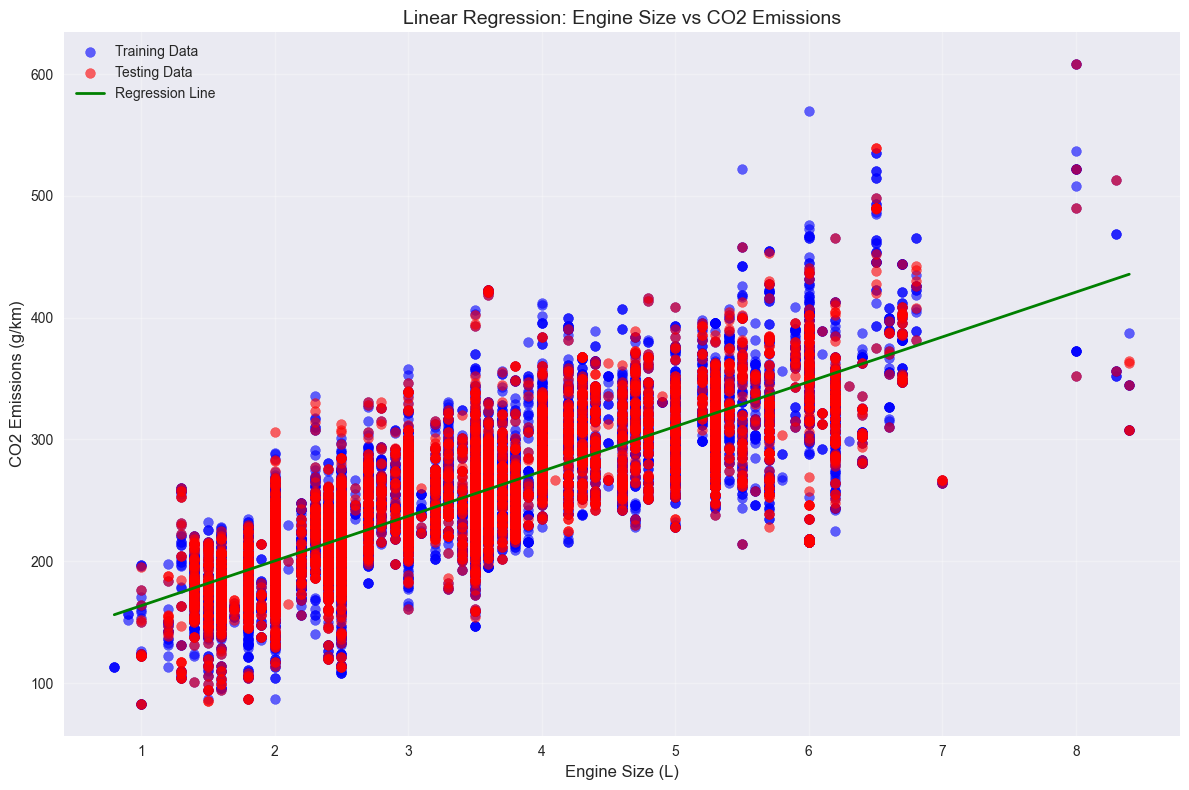

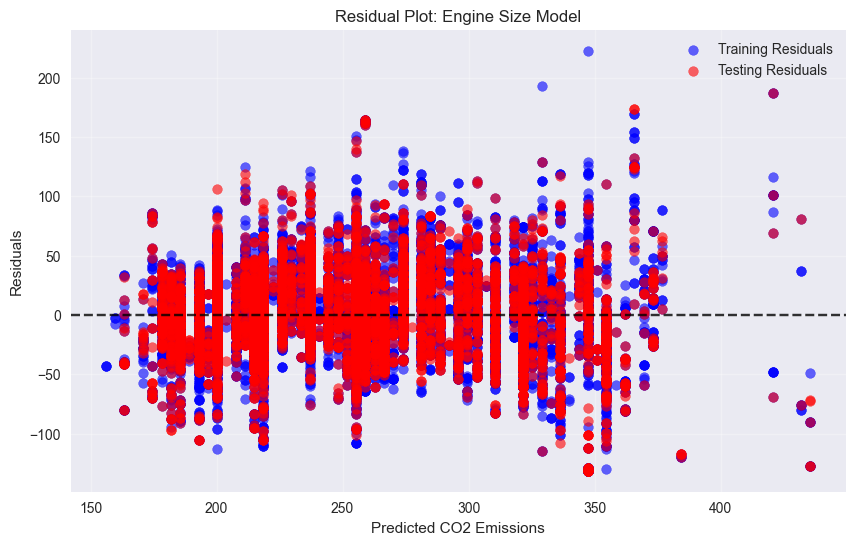

In [9]:
plt.figure(figsize=(12, 8))

# Plot training data
plt.scatter(X_train, y_train, alpha=0.6, color='blue', label='Training Data', s=50)

# Plot testing data
plt.scatter(X_test, y_test, alpha=0.6, color='red', label='Testing Data', s=50)

# Plot regression line
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_pred = model_engine.predict(X_range)
plt.plot(X_range, y_range_pred, color='green', linewidth=2, label='Regression Line')

plt.xlabel('Engine Size (L)', fontsize=12)
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)
plt.title('Linear Regression: Engine Size vs CO2 Emissions', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Residual plot
plt.figure(figsize=(10, 6))
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

plt.scatter(y_train_pred, residuals_train, alpha=0.6, color='blue', label='Training Residuals')
plt.scatter(y_test_pred, residuals_test, alpha=0.6, color='red', label='Testing Residuals')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.8)
plt.xlabel('Predicted CO2 Emissions')
plt.ylabel('Residuals')
plt.title('Residual Plot: Engine Size Model')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 5.4 Model Evaluation

In [10]:
r2_train_engine = r2_score(y_train, y_train_pred)
r2_test_engine = r2_score(y_test, y_test_pred)

# Calculate RMSE
rmse_train_engine = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_engine = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("=== MODEL EVALUATION: ENGINE SIZE ===")
print(f"Training R² Score: {r2_train_engine:.4f}")
print(f"Testing R² Score: {r2_test_engine:.4f}")
print(f"Training RMSE: {rmse_train_engine:.2f} g/km")
print(f"Testing RMSE: {rmse_test_engine:.2f} g/km")

print(f"\n=== INTERPRETATION ===")
print(f"• The model explains {r2_test_engine*100:.1f}% of the variance in CO2 emissions")
print(f"• For every 1L increase in engine size, CO2 emissions increase by {model_engine.coef_[0]:.1f} g/km")
if r2_test_engine > 0.7:
    print("• This is considered a strong relationship")
elif r2_test_engine > 0.5:
    print("• This is considered a moderate relationship")
else:
    print("• This is considered a weak relationship")

=== MODEL EVALUATION: ENGINE SIZE ===
Training R² Score: 0.6776
Testing R² Score: 0.6669
Training RMSE: 33.88 g/km
Testing RMSE: 33.83 g/km

=== INTERPRETATION ===
• The model explains 66.7% of the variance in CO2 emissions
• For every 1L increase in engine size, CO2 emissions increase by 36.8 g/km
• This is considered a moderate relationship


## 6. Identify Another Appropriate Independent Variable

Correlation with CO2 Emissions (absolute values):
EMISSIONS           1.000000
COMB (L/100 km)     0.922983
FUEL CONSUMPTION    0.919101
COMB (mpg)          0.901844
HWY (L/100 km)      0.894781
ENGINE SIZE         0.821285
CYLINDERS           0.802176
YEAR                0.047869
Name: EMISSIONS, dtype: float64


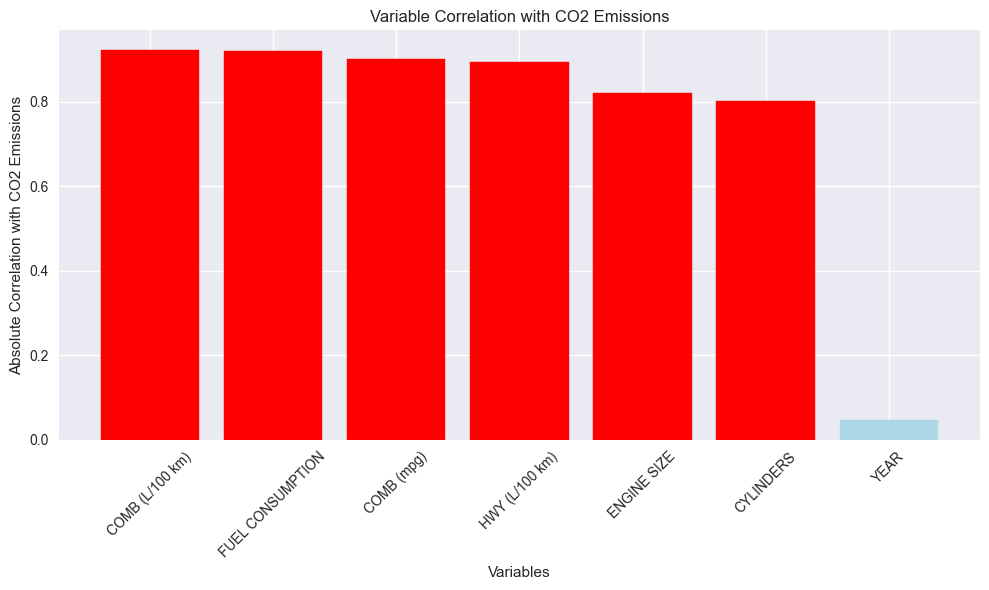


Second most correlated variable with CO2 Emissions: COMB (L/100 km)
Correlation coefficient: 0.9230


In [11]:
correlations = df[numeric_columns].corr()['EMISSIONS'].abs().sort_values(ascending=False)
print("Correlation with CO2 Emissions (absolute values):")
print(correlations)

# Visualize correlations
plt.figure(figsize=(10, 6))
correlations_filtered = correlations[correlations.index != 'EMISSIONS']  # Remove self-correlation
bars = plt.bar(range(len(correlations_filtered)), correlations_filtered.values)
plt.xlabel('Variables')
plt.ylabel('Absolute Correlation with CO2 Emissions')
plt.title('Variable Correlation with CO2 Emissions')
plt.xticks(range(len(correlations_filtered)), correlations_filtered.index, rotation=45)

# Color bars based on correlation strength
for i, bar in enumerate(bars):
    if correlations_filtered.values[i] > 0.7:
        bar.set_color('red')
    elif correlations_filtered.values[i] > 0.5:
        bar.set_color('orange')
    else:
        bar.set_color('lightblue')

plt.tight_layout()
plt.show()

# Select the second most correlated variable (after ENGINE SIZE)
second_best_var = correlations_filtered.index[1] if correlations_filtered.index[0] == 'ENGINE SIZE' else correlations_filtered.index[0]
print(f"\nSecond most correlated variable with CO2 Emissions: {second_best_var}")
print(f"Correlation coefficient: {correlations[second_best_var]:.4f}")

## 7. Second Linear Regression Model


In [12]:
X2 = df[second_best_var].values.reshape(-1, 1)
y2 = df['EMISSIONS'].values

# Split the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

print(f"Using {second_best_var} as independent variable")
print(f"Training set size: {X2_train.shape[0]} samples")
print(f"Testing set size: {X2_test.shape[0]} samples")

Using COMB (L/100 km) as independent variable
Training set size: 15789 samples
Testing set size: 6767 samples


Model Coefficient (Slope): 18.8185
Model Intercept: 42.3389

Linear Equation: CO2 Emissions = 18.8185 * COMB (L/100 km) + 42.3389


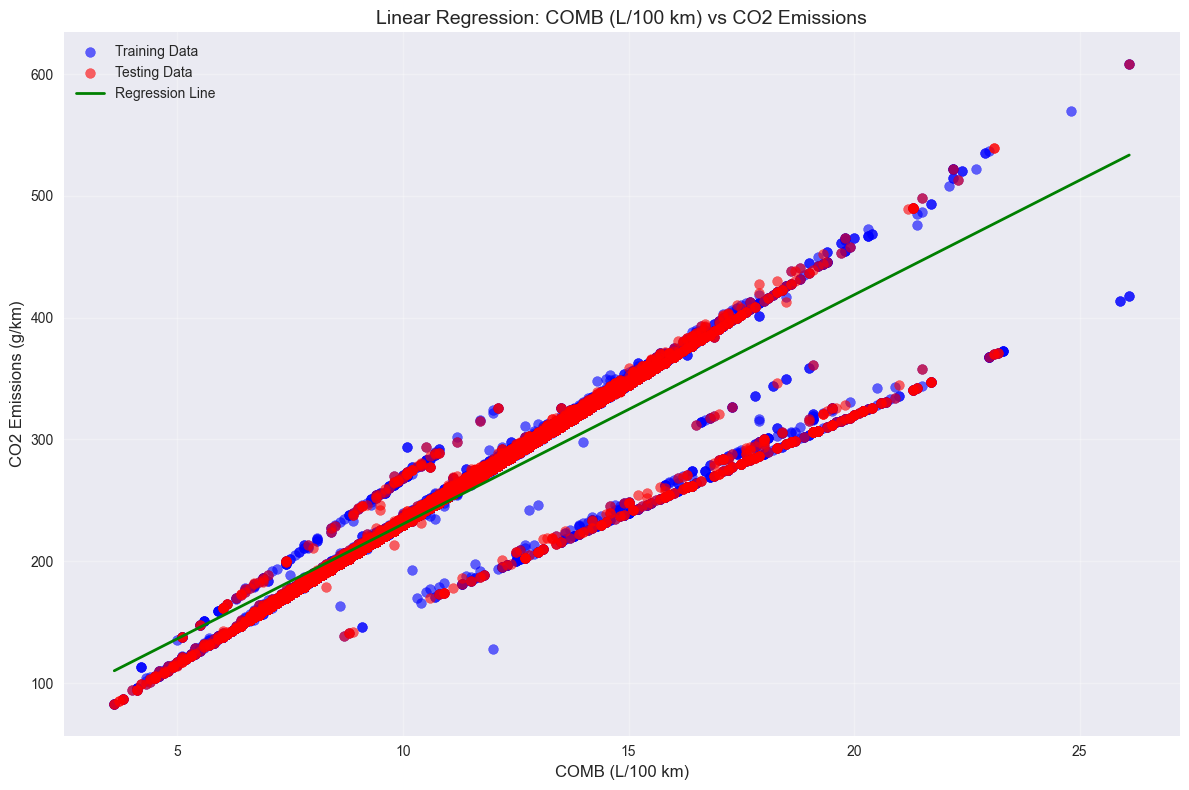

In [13]:
### 7.2 Apply Linear Regression for Second Variable


# Create and train the second linear regression model
model_second = LinearRegression()
model_second.fit(X2_train, y2_train)

# Make predictions
y2_train_pred = model_second.predict(X2_train)
y2_test_pred = model_second.predict(X2_test)

# Display model parameters
print(f"Model Coefficient (Slope): {model_second.coef_[0]:.4f}")
print(f"Model Intercept: {model_second.intercept_:.4f}")
print(f"\nLinear Equation: CO2 Emissions = {model_second.coef_[0]:.4f} * {second_best_var} + {model_second.intercept_:.4f}")


### 7.3 Visualize Second Model

# Create scatter plot with regression line for second variable
plt.figure(figsize=(12, 8))

# Plot training data
plt.scatter(X2_train, y2_train, alpha=0.6, color='blue', label='Training Data', s=50)

# Plot testing data
plt.scatter(X2_test, y2_test, alpha=0.6, color='red', label='Testing Data', s=50)

# Plot regression line
X2_range = np.linspace(X2.min(), X2.max(), 100).reshape(-1, 1)
y2_range_pred = model_second.predict(X2_range)
plt.plot(X2_range, y2_range_pred, color='green', linewidth=2, label='Regression Line')

plt.xlabel(f'{second_best_var}', fontsize=12)
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)
plt.title(f'Linear Regression: {second_best_var} vs CO2 Emissions', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 7.4 Evaluate Second Model

In [14]:
r2_train_second = r2_score(y2_train, y2_train_pred)
r2_test_second = r2_score(y2_test, y2_test_pred)

# Calculate RMSE for second model
rmse_train_second = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
rmse_test_second = np.sqrt(mean_squared_error(y2_test, y2_test_pred))

print(f"=== MODEL EVALUATION: {second_best_var} ===")
print(f"Training R² Score: {r2_train_second:.4f}")
print(f"Testing R² Score: {r2_test_second:.4f}")
print(f"Training RMSE: {rmse_train_second:.2f} g/km")
print(f"Testing RMSE: {rmse_test_second:.2f} g/km")

print(f"\n=== INTERPRETATION ===")
print(f"• The model explains {r2_test_second*100:.1f}% of the variance in CO2 emissions")
if second_best_var in ['COMB (L/100 km)', 'HWY (L/100 km)']:
    print(f"• For every 1 L/100km increase in {second_best_var}, CO2 emissions increase by {model_second.coef_[0]:.1f} g/km")
elif second_best_var == 'CYLINDERS':
    print(f"• For every additional cylinder, CO2 emissions increase by {model_second.coef_[0]:.1f} g/km")
else:
    print(f"• For every unit increase in {second_best_var}, CO2 emissions change by {model_second.coef_[0]:.1f} g/km")

if r2_test_second > 0.7:
    print("• This is considered a strong relationship")
elif r2_test_second > 0.5:
    print("• This is considered a moderate relationship")
else:
    print("• This is considered a weak relationship")

=== MODEL EVALUATION: COMB (L/100 km) ===
Training R² Score: 0.8518
Testing R² Score: 0.8522
Training RMSE: 22.97 g/km
Testing RMSE: 22.53 g/km

=== INTERPRETATION ===
• The model explains 85.2% of the variance in CO2 emissions
• For every 1 L/100km increase in COMB (L/100 km), CO2 emissions increase by 18.8 g/km
• This is considered a strong relationship


## 8. Model Comparison


=== MODEL COMPARISON ===
             Model  Training R²  Testing R²  Training RMSE  Testing RMSE
0      Engine Size       0.6776      0.6669        33.8795       33.8300
1  COMB (L/100 km)       0.8518      0.8522        22.9729       22.5338


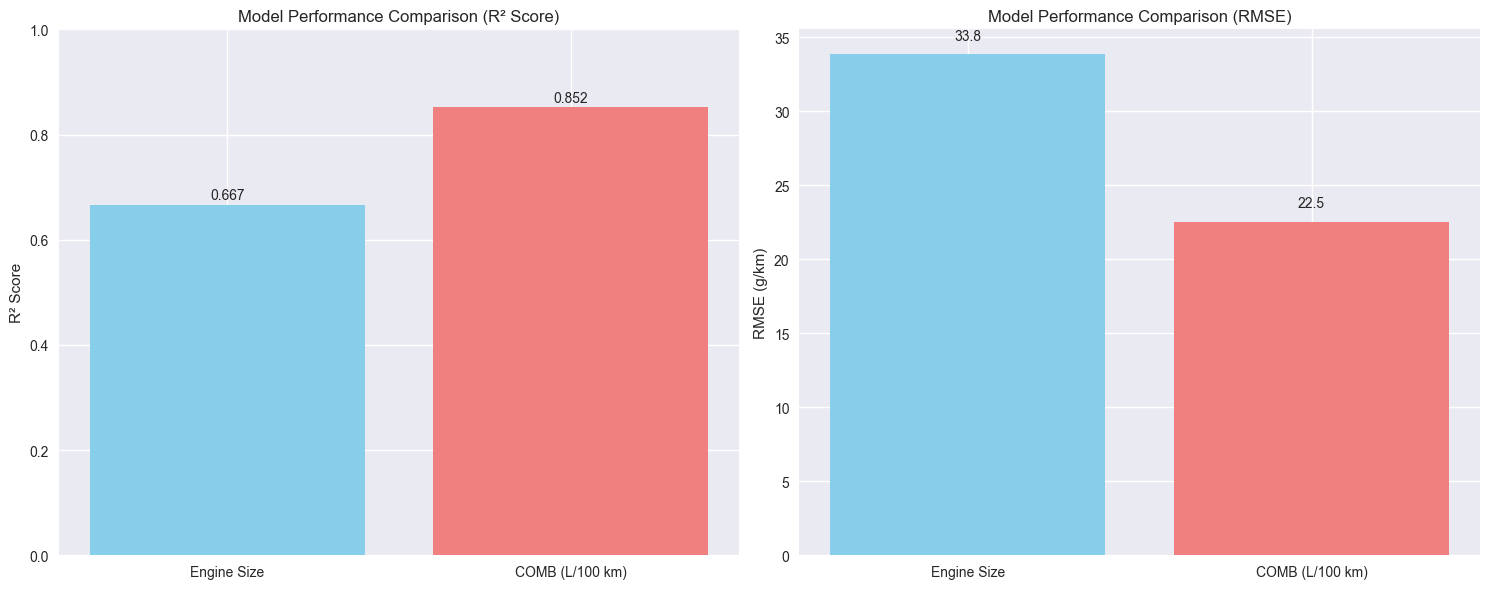

In [15]:
comparison_data = {
    'Model': ['Engine Size', second_best_var],
    'Training R²': [r2_train_engine, r2_train_second],
    'Testing R²': [r2_test_engine, r2_test_second],
    'Training RMSE': [rmse_train_engine, rmse_train_second],
    'Testing RMSE': [rmse_test_engine, rmse_test_second]
}

comparison_df = pd.DataFrame(comparison_data)
print("=== MODEL COMPARISON ===")
print(comparison_df.round(4))

# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

models = ['Engine Size', second_best_var]
r2_scores = [r2_test_engine, r2_test_second]
rmse_scores = [rmse_test_engine, rmse_test_second]

# R² comparison
bars1 = axes[0].bar(models, r2_scores, color=['skyblue', 'lightcoral'])
axes[0].set_ylabel('R² Score')
axes[0].set_title('Model Performance Comparison (R² Score)')
axes[0].set_ylim(0, 1)
for i, v in enumerate(r2_scores):
    axes[0].text(i, v + 0.01, f'{v:.3f}', ha='center')

# RMSE comparison
bars2 = axes[1].bar(models, rmse_scores, color=['skyblue', 'lightcoral'])
axes[1].set_ylabel('RMSE (g/km)')
axes[1].set_title('Model Performance Comparison (RMSE)')
for i, v in enumerate(rmse_scores):
    axes[1].text(i, v + 1, f'{v:.1f}', ha='center')

plt.tight_layout()
plt.show()

In [16]:
print("\n=== FINAL CONCLUSIONS ===")
if r2_test_engine > r2_test_second:
    print(f"• Engine Size is a better predictor of CO2 emissions (R² = {r2_test_engine:.3f})")
    print(f"• Engine Size model explains {(r2_test_engine - r2_test_second)*100:.1f}% more variance than {second_best_var}")
else:
    print(f"• {second_best_var} is a better predictor of CO2 emissions (R² = {r2_test_second:.3f})")
    print(f"• {second_best_var} model explains {(r2_test_second - r2_test_engine)*100:.1f}% more variance than Engine Size")

print(f"• Both variables show significant correlation with CO2 emissions")
print(f"• The relationship appears to be linear and suitable for linear regression modeling")


=== FINAL CONCLUSIONS ===
• COMB (L/100 km) is a better predictor of CO2 emissions (R² = 0.852)
• COMB (L/100 km) model explains 18.5% more variance than Engine Size
• Both variables show significant correlation with CO2 emissions
• The relationship appears to be linear and suitable for linear regression modeling
